
- des - primary designation of the asteroid or comet (e.g., 443, 2000 SG344)

- orbit_id - orbit ID used for the close-approach computation
- jd - time of close-approach (JD Ephemeris Time, TDB)
- -->**cd - time of close-approach (formatted calendar date/time, TDB)**
- dist - nominal approach distance (au)
- dist_min - minimum (3-sigma) approach distance (au)
- dist_max - maximum (3-sigma) approach distance (au)
- v_rel - velocity relative to the approach body at close approach (km/s)
- v_inf - velocity relative to a massless body (km/s)
- -->**t_sigma_f - 3-sigma uncertainty in the time of close-approach (formatted in days, hours, and minutes; days are not included if zero; example “13:02” is 13 hours 2 minutes; example “2_09:08” is 2 days 9 hours 8 minutes)**
- -->**body - name of the close-approach body (e.g., Earth) only output if the body query parameters is set to ALL**
- **h - absolute magnitude H (mag)**
- **diameter - diameter of the body (km)**
- optional - only output if requested with the diameter query parameter
null if not known   
- diameter_sigma - 1-sigma uncertainty in the diameter of the body (km)
    - optional - only output if requested with the diameter query parameter
    - null if not known
- fullname - formatted full-name/designation of the asteroid or comet
    - optional - only output if requested with the fullname query parameter
    - formatted with leading spaces for column alignment in monospaced font tables

In [35]:
import requests
import pandas as pd

In [36]:
url = 'https://ssd-api.jpl.nasa.gov/cad.api'
params = {#'dist-max': '1',
           'h-max': '20',
          'date-min': '1980-01-01',
          'date-max': '2060-01-01'}
response = requests.get(url, params)
print(f'''url: {response.url}
number of entries {response.json()['count']}''')


url: https://ssd-api.jpl.nasa.gov/cad.api?h-max=20&date-min=1980-01-01&date-max=2060-01-01
number of entries 583


In [37]:
data = response.json()
data_cols = data['fields']
data_vals = data['data']
asteroids = pd.DataFrame(data_vals, columns=data_cols)
asteroids.head(1)

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,576763,36,2444428.918901162,1980-Jul-08 10:03,0.0438457303214753,0.0438428310558048,0.0438486296104317,6.84126492355983,6.83237637475617,00:02,19.30


In [38]:
asteroids['cd'] = pd.to_datetime(asteroids['cd'])
asteroids['orbit_id'] = pd.to_numeric(asteroids['orbit_id'])
# asteroids['des'] = pd.to_numeric(asteroids['des'])
asteroids['jd'] = pd.to_numeric(asteroids['jd'], downcast='float')
asteroids['dist'] = pd.to_numeric(asteroids['dist'], downcast='float')
asteroids['dist_min'] = pd.to_numeric(asteroids['dist_min'], downcast='float')
asteroids['dist_max'] = pd.to_numeric(asteroids['dist_max'], downcast='float')
asteroids['v_rel'] = pd.to_numeric(asteroids['v_rel'], downcast='float')
asteroids['v_inf'] = pd.to_numeric(asteroids['v_inf'], downcast='float')
asteroids['h'] = pd.to_numeric(asteroids['h'], downcast='float')

In [39]:
asteroids.dtypes

des                  object
orbit_id              int64
jd                  float64
cd           datetime64[ns]
dist                float32
dist_min            float32
dist_max            float32
v_rel               float32
v_inf               float32
t_sigma_f            object
h                   float32
dtype: object

In [40]:
asteroids
dist = asteroids['dist']
time_cd = asteroids['cd']

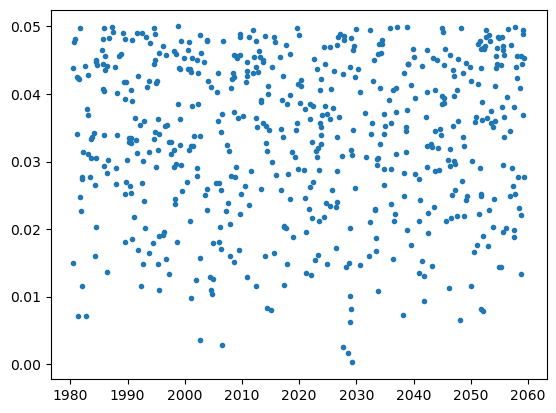

In [41]:
import matplotlib.pyplot as plt
plt.plot(time_cd, dist, '.')

In [42]:
time_cd.min()
min_time = datetime.datetime(1980, 7, 8)
max_time = datetime.datetime(2100, 1, 1)

In [43]:
import plotly.graph_objects as go
import datetime

# Sample data: asteroid positions and times
asteroid_distances = dist  # Sample distances (replace with actual data)
asteroid_times = time_cd

# Create the plot
fig = go.Figure()

# Plot asteroids
fig.add_trace(go.Scatter(x=asteroid_times, y=asteroid_distances, mode='markers',
                         marker=dict(color='lightblue', size=3), name='Asteroids'))

# Plot Earth
fig.add_trace(go.Scatter(x=[datetime.datetime.now()], y=[0], mode='markers',
                         marker=dict(color='red', size=12), name='Earth'))

# vertical line at present
fig.add_trace(go.Scatter(x=[datetime.datetime.now(), datetime.datetime.now()], y=[0, max(asteroid_distances)],
                         mode='lines', line=dict(color='white', width=1, dash='dot'), name='Present'))

# layout
fig.update_layout(
    title='Asteroid Close Approaches to Earth',
    xaxis=dict(title='Time', tickformat='%Y', range=[datetime.datetime.now() - datetime.timedelta(days=365.25*30)
                                                     , datetime.datetime.now()+ datetime.timedelta(days = 365.25*30)],
                                                          showgrid=False),
    yaxis=dict(title='Distance from Earth (AU)', showgrid=False),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font = dict(color = 'white')
)

# Show the plot
fig.show()


In [25]:
from urllib.parse import urlencode

In [26]:
params = {#'dist-max': '1',
        #   'h-max': '20',
          'date-min': '1980-01-01',
          'date-max': '2030-01-01'}
url + '?' + urlencode(params)

'https://ssd-api.jpl.nasa.gov/cad.api?date-min=1980-01-01&date-max=2030-01-01'